Code to achieve a completely uncorrelated distribution of the parameters on the chip.
There are 16 (25) resonators in total
In our case the parameters are (all lengths in microns):
1. frequency (inverse length), evenly spaced from 5-11 GHz
2. w+2s, with values: 10, sqrt(2)*10, 20, sqrt(2)*20, (40)
3. w/s, with values: 1/sqrt(2), 1, sqrt(2), 2, (2*sqrt(2))
4. hole separation: / (no holes), 10, 100
5. location on the chip, enumerated 1-16 (25)


In [1]:
!pip install pandas

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import time

In [5]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25] #position
f= np.linspace(5,11,25) #frequency in GHz
w2s= [10, 10*np.sqrt(2), 20, 20*np.sqrt(2), 40] #w+2s length
w2s_full= np.tile(w2s, 5) 
wsr= [1/np.sqrt(2), 1, np.sqrt(2), 2, 2*np.sqrt(2)] #w/s ratio
wsr_full= np.tile(wsr,5)
h = [0, 1/10, 1/100] #hole denisty: 1/distance of holes in the horizontal part of the resonator core.
h_full= np.append(np.tile(h,8), h[2])   #here I have chosen for the value 1/100 to be included once more than the others
                                        #0 in this case refers to no holes at all (infinite separation).
    
print(p)
print(f)
print(w2s_full)
print(wsr_full)
print(h_full)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[ 5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75
  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75
 11.  ]
[10.         14.14213562 20.         28.28427125 40.         10.
 14.14213562 20.         28.28427125 40.         10.         14.14213562
 20.         28.28427125 40.         10.         14.14213562 20.
 28.28427125 40.         10.         14.14213562 20.         28.28427125
 40.        ]
[0.70710678 1.         1.41421356 2.         2.82842712 0.70710678
 1.         1.41421356 2.         2.82842712 0.70710678 1.
 1.41421356 2.         2.82842712 0.70710678 1.         1.41421356
 2.         2.82842712 0.70710678 1.         1.41421356 2.
 2.82842712]
[0.7071067811865475, 1, 1.4142135623730951, 2, 2.8284271247461903]
[0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1
 0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.01]


Running time 189.64081716537476
Correlation coefficient 0.6400704046188124
       0      1          2         3     4
0    1.0   5.50  28.284271  0.707107  0.00
1    2.0   7.00  10.000000  2.000000  0.01
2    3.0  10.50  40.000000  2.000000  0.10
3    4.0   6.25  10.000000  0.707107  0.10
4    5.0  10.75  10.000000  1.000000  0.01
5    6.0   9.00  14.142136  2.000000  0.10
6    7.0   5.00  20.000000  2.000000  0.01
7    8.0   7.50  14.142136  1.414214  0.10
8    9.0  10.00  40.000000  1.000000  0.00
9   10.0   7.25  28.284271  2.000000  0.01
10  11.0   5.75  14.142136  0.707107  0.00
11  12.0   8.75  14.142136  2.828427  0.00
12  13.0   9.25  40.000000  1.414214  0.01
13  14.0   6.50  40.000000  2.828427  0.10
14  15.0   8.50  10.000000  1.414214  0.01
15  16.0   6.75  14.142136  1.000000  0.01
16  17.0   7.75  40.000000  0.707107  0.00
17  18.0   9.75  20.000000  1.414214  0.10
18  19.0   6.00  28.284271  1.000000  0.01
19  20.0   9.50  10.000000  2.828427  0.00
20  21.0  11.00  28.28

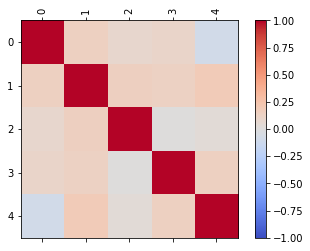

In [26]:
start = time.time()
cc=10
while cc > 5: #loop that ensures that the sum of all correlation coefficients is small
    data = np.zeros((25,5))
    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w2s_full)
    data[:,2] = w2s_full

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full
    
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break

    rd.shuffle(h_full)
    data[:,4] = h_full

    if checked == True:
        df = pd.DataFrame(data)
        corr = df.corr()
        cc=0
        for i in range(0, len(data[0])):
            for j in range(0, i-1):
                if i != j:
                    if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                        cc = 10
                        break
                    else:
                        cc += abs(corr.iloc[i,j])
    else:
        continue 
                
end = time.time()
print("Running time", end - start)
print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The following cell contains the code that uncorrelates the parameters not only linearly but also quadratically! It checks whether the average correlation is below some value. Furthermore it checks whether all individual correlations are below a certain value.

In [ ]:
cc=100
while cc > 10:
    data = np.zeros((25,10))

    data[:,0] = p
    data[:,5] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,6] = np.square(f)
    
    rd.shuffle(w2s_full)
    data[:,2] = w2s_full
    data[:,7] = np.square(w2s_full)

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full
    data[:,8] = np.square(wsr_full)
    
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
                    
    rd.shuffle(h_full)
    data[:,4] = h_full
    data[:,9] = np.square(h_full)
    if checked == True   
        df = pd.DataFrame(data)
        corr = df.corr()
        cc=0
        for i in range(0,len(data[0])):
            for j in range(0,i-1):
                if i != j and i+5 != j and i != j+5:
                    if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                        cc = 100
                        break
                    else:
                        cc += abs(corr.iloc[i,j])
    else:
        continue

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The script below gives a different importance to the linear-linear correlations of the parameters, and the linear-quadratic, quadratic-quadratic correlations.

Running time 440.3184609413147 seconds
       0      1          2         3     4      5         6       7    8  \
0    1.0   9.75  14.142136  2.828427  0.10    1.0   95.0625   200.0  8.0   
1    2.0   5.25  28.284271  2.828427  0.01    4.0   27.5625   800.0  8.0   
2    3.0   5.75  40.000000  1.414214  0.01    9.0   33.0625  1600.0  2.0   
3    4.0   5.00  28.284271  1.000000  0.10   16.0   25.0000   800.0  1.0   
4    5.0   8.25  20.000000  1.000000  0.10   25.0   68.0625   400.0  1.0   
5    6.0   8.00  40.000000  2.000000  0.00   36.0   64.0000  1600.0  4.0   
6    7.0   9.50  10.000000  0.707107  0.01   49.0   90.2500   100.0  0.5   
7    8.0  10.75  40.000000  1.000000  0.00   64.0  115.5625  1600.0  1.0   
8    9.0   9.00  28.284271  0.707107  0.00   81.0   81.0000   800.0  0.5   
9   10.0   7.75  20.000000  2.828427  0.01  100.0   60.0625   400.0  8.0   
10  11.0   7.25  10.000000  1.000000  0.00  121.0   52.5625   100.0  1.0   
11  12.0   8.75  10.000000  2.828427  0.01  144.0

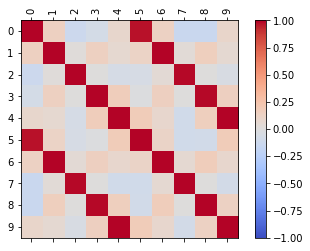

In [31]:
start = time.time()
cc = False
data = np.zeros((25,10))
while cc == False:
    rd.shuffle(w2s_full)
    data[:,2] = w2s_full
    
    rd.shuffle(wsr_full)
    data[:,3] = wsr_full
        
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
    
    data[:,7] = np.square(w2s_full)
    data[:,8] = np.square(wsr_full)
    data[:,0] = p
    data[:,5] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,6] = np.square(f)
    
    rd.shuffle(h_full)
    data[:,4] = h_full
    data[:,9] = np.square(h_full)
                
    if checked == True:
        df = pd.DataFrame(data)
        corr = df.corr()
        cc = True
        for i in range(0,len(data[0])):
            for j in range(0, i-1):
                if i != j and i+5 != j and i != j+5: #we don't care about the diagnoal autocorrelations.
                    if i <= 4 and j <= 4:
                        if abs(corr.iloc[i,j]) > 0.15:
                            cc = False 
                            break
                    else:
                        if abs(corr.iloc[i,j]) > 0.25: #makes sure that no individual correlation is large 
                            cc = False
                            break
    else:
        continue

end = time.time()
print("Running time", end - start, "seconds")
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()